### BANKRUPCY PREDICTION MODEL

### Project Introduction: Predicting Bankruptcy for Indian Companies
In this project, we aim to develop a robust predictive model to identify companies in China at risk of bankruptcy. This is a critical task, as early identification of financial distress can help stakeholders, including investors, regulators, and policymakers, take proactive measures to mitigate potential risks.  

Our objective is to build a machine learning model that not only predicts bankruptcy but also outperforms the baseline model, ensuring higher accuracy and reliability. By leveraging financial indicators, company data, and other relevant features, we will train and evaluate the model to deliver actionable insights for effective decision-making.  

This project combines data-driven techniques with domain expertise to address a pressing issue in the corporate landscape, ultimately contributing to a more resilient economic ecosystem.

### Necessary Libraries for the Model

In [1]:
import pandas as pd
import numpy as np
import gzip
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

### Import Dataset for the Project

In [2]:
# Read in csv
data = pd.read_csv("data.csv")


In [3]:
#Print first 5 rows of our dataset
data.head()


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


### Exploratory Data Analysis
Exploratory Data Analysis (EDA) is the process of examining a dataset to summarize its main characteristics, often using visual and statistical methods. The goal is to understand the data’s structure, detect patterns, spot anomalies, and form hypotheses for further analysis

In [4]:
# understanding the datatype of each column in our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [5]:
# Getting the descrptive statistics of the dataset
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [6]:
#Checking for null value
data.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [7]:
#checking the composition of our target
data["Bankrupt?"].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

Text(0.5, 1.0, 'Data Imbalance')

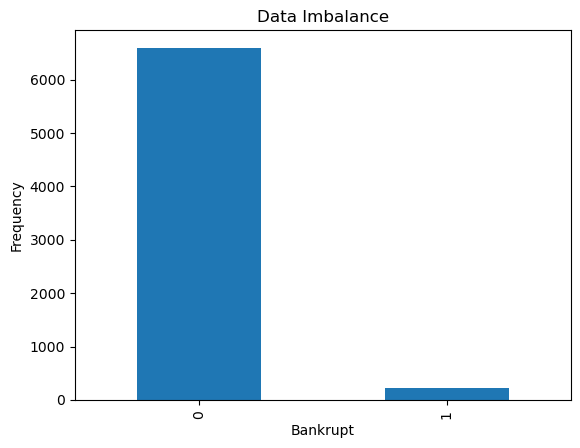

In [8]:
# Visualizing the outcome of our target to gain understanding of gap 
data["Bankrupt?"].value_counts().plot(kind="bar")
plt.xlabel("Bankrupt")
plt.ylabel("Frequency")
plt.title("Data Imbalance")

The visualization above highlights a clear imbalance in our dataset, which could negatively impact the performance and fairness of our predictive model. To address this, we will implement techniques to balance the dataset, ensuring that the model learns effectively from all classes and delivers reliable predictions


In [9]:
# To see the correlation between the features
corr = data.drop(columns =["Bankrupt?"]).corr()
corr

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
ROA(C) before interest and depreciation before interest,1.000000,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,0.051328,...,0.887670,-0.071725,0.008135,0.334721,0.274287,-0.143629,-0.016575,0.010573,NaN,0.052416
ROA(A) before interest and % after tax,0.940124,1.000000,0.955741,0.326969,0.324956,0.032053,0.053518,0.049474,0.029649,0.049909,...,0.961552,-0.098900,0.011463,0.326971,0.291744,-0.141039,-0.011515,0.013372,NaN,0.057887
ROA(B) before interest and depreciation after tax,0.986849,0.955741,1.000000,0.333749,0.331755,0.035212,0.053726,0.049952,0.022366,0.052261,...,0.912040,-0.089088,0.007523,0.333750,0.280617,-0.142838,-0.014663,0.011473,NaN,0.056430
Operating Gross Margin,0.334719,0.326969,0.333749,1.000000,0.999518,0.005745,0.032493,0.027175,0.051438,0.029430,...,0.300143,0.022672,0.004205,1.000000,0.075304,-0.085434,-0.011806,-0.001167,NaN,0.120029
Realized Sales Gross Margin,0.332755,0.324956,0.331755,0.999518,1.000000,0.005610,0.032232,0.026851,0.051242,0.029166,...,0.298155,0.022750,0.004038,0.999518,0.074891,-0.085407,-0.011268,-0.001158,NaN,0.120196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Liability to Equity,-0.143629,-0.141039,-0.142838,-0.085434,-0.085407,0.001541,-0.004043,-0.004390,-0.011899,-0.002996,...,-0.159697,0.021982,-0.003724,-0.085434,-0.791836,1.000000,0.002119,0.001487,NaN,-0.159654
Degree of Financial Leverage (DFL),-0.016575,-0.011515,-0.014663,-0.011806,-0.011268,0.000935,0.000855,0.000927,-0.000556,0.000774,...,-0.010463,-0.001881,-0.008812,-0.011806,-0.000093,0.002119,1.000000,0.016513,NaN,-0.016739
Interest Coverage Ratio (Interest expense to EBIT),0.010573,0.013372,0.011473,-0.001167,-0.001158,0.000393,0.000984,0.000957,0.001024,0.000798,...,0.012746,0.000239,0.001027,-0.001169,0.005147,0.001487,0.016513,1.000000,NaN,-0.008339
Net Income Flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

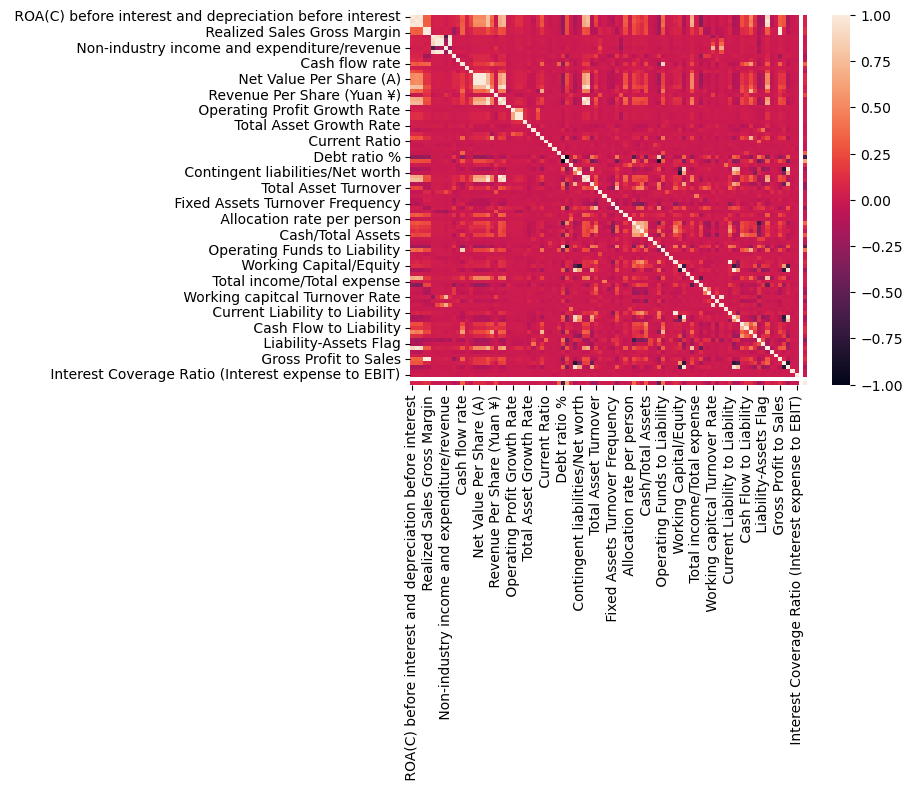

In [10]:
# creating a heat map to show the multicollinearity
sns.heatmap(corr)

### Split Data Into Train and Test set

In [11]:
# seperating the data into tran and test set
X = data.drop(columns = ["Bankrupt?"])
y = data["Bankrupt?"]

In [12]:
# getting your train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print("X_train:", X_train.shape)
print("y_train:", y_train.shape )
print("X_test:", X_test.shape )
print("y_test:", y_test.shape )


X_train: (5114, 95)
y_train: (5114,)
X_test: (1705, 95)
y_test: (1705,)


### Treating Data imbalance

In other to solve the problem of data inmbalance in out dataset we will invoke Random Over Sampler

In [13]:
# Instantiating RandomOverSampler 
over_sampler = RandomOverSampler(random_state = 42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print("X_train_shape:", X_train_over.shape)
print("y_train_shape:",y_train_over.shape)

X_train_shape: (9904, 95)
y_train_shape: (9904,)


In [14]:
y_train_over.value_counts()

Bankrupt?
0    4952
1    4952
Name: count, dtype: int64

Text(0.5, 1.0, 'Class Balance')

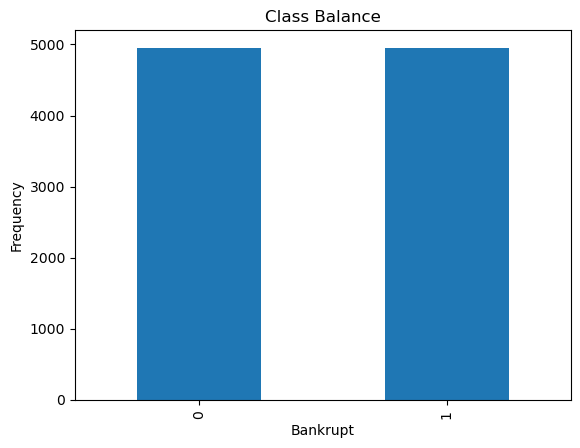

In [15]:
y_train_over.value_counts().plot(kind="bar")
plt.xlabel("Bankrupt")
plt.ylabel("Frequency")
plt.title("Class Balance")

### Model Building

In this work, we focus on optimizing our model's performance through hyperparameter tuning. Hyperparameters are configuration settings that govern the learning process and are not learned from the data. Choosing the right combination of hyperparameters is crucial for improving a model’s accuracy, generalization, and efficiency.

To achieve this, we will apply the grid search method, a systematic approach that evaluates different combinations of hyperparameters to identify the optimal settings. By fine-tuning these parameters, we aim to enhance model performance and achieve more reliable predictions. 

### Baseline Model
In other to be able to determine if our Model generalizes we will create a baseline model which will be a baseline to measure the performance of our model.

In [16]:
Baseline = data["Bankrupt?"].value_counts(normalize=True).max()
print("Baseline:", round(Baseline, 3))

Baseline: 0.968


#### Model Selection and Hyperparameter Tuning using Grid Search

In this step, we automate the selection of the best-performing model and its optimal hyperparameters using Grid Search. Instead of manually training and evaluating different models, we define a range of candidate models and their respective hyperparameter grids. GridSearchCV then systematically explores all possible configurations and selects the best combination based on performance metrics.



In [17]:
# Define models and their respective hyperparameter grids

param_grid = {
    'Random Forest': {
        'n_estimators': [10, 50, 100],  
        'max_depth': [None, 10, 20]
    },
    'Gradient Boosting': {
        'n_estimators': [10, 50, 100],
        'max_depth': [None, 10, 20]
    }
    }


In [18]:
models = {
    "Random Forest": RandomForestClassifier(),
    'Gradient Boosting':GradientBoostingClassifier(),
# 'model': GradientBoostingClassifier()
}

In [19]:

# Dictionaries to store best models and their scores
best_models = {}
best_scores = {}

# Iterate through each model and perform Grid Search
for name, model in models.items():
    print(f"Tuning {name}...")

    # Perform Grid Search
    grid = GridSearchCV(model, param_grid[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)  

    # Store the best model and its score
    best_models[name] = grid.best_estimator_
    best_scores[name] = grid.best_score_
    
    print(f"Best parameters for {name}: {grid.best_params_}")
    print(f"Best cross-validation accuracy for {name}: {grid.best_score_}\n")

# Select the best model based on highest accuracy
best_model_name = max(best_scores, key=best_scores.get)
best_model = best_models[best_model_name]

print(f"\nBest Performing Model: {best_model_name} with Accuracy: {best_scores[best_model_name]}")


Tuning Random Forest...
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 50}
Best cross-validation accuracy for Random Forest: 0.9700824289865386

Tuning Gradient Boosting...
Best parameters for Gradient Boosting: {'max_depth': 10, 'n_estimators': 50}
Best cross-validation accuracy for Gradient Boosting: 0.9648028801365081


Best Performing Model: Random Forest with Accuracy: 0.9700824289865386


The best performing model is Random Forest, so we will be focusing on random forest

# Model Performance Analysis
Based on our results, both Random Forest and Gradient Boosting outperformed the baseline model, demonstrating their effectiveness in predicting bankruptcy. However, Random Forest emerged as the best-performing model, achieving the highest accuracy and overall stability. Given its superior performance and ability to generalize well on unseen data, we have selected Random Forest as our preferred model for further analysis and deployment.

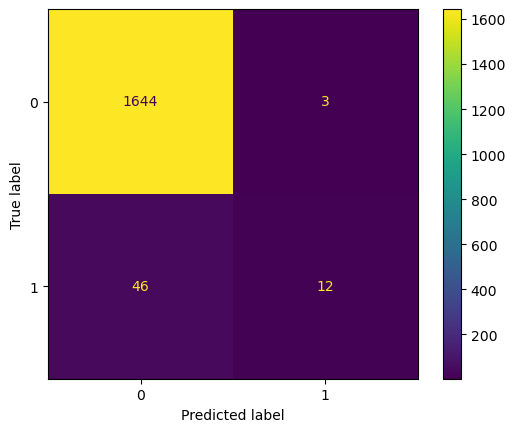

In [20]:
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)

ConfusionMatrixDisplay.from_estimator(best_model,X_test, y_test)

In [23]:
# Predict using the best model
y_pred = best_model.predict(X_test)

# Print classification report
print(f"Classification Report for {best_model_name}:\n")
print(classification_report(y_test, y_pred))

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1647
           1       0.80      0.21      0.33        58

    accuracy                           0.97      1705
   macro avg       0.89      0.60      0.66      1705
weighted avg       0.97      0.97      0.96      1705



### Overall Accuracy:
Accuracy: 97% implies the model correctly classifies 97% of all instances.  
Note however, accuracy alone is not a sufficient metric due to the class imbalance (more class 0 than class 1).
### Class-wise Performance:
#### Class 0 (Non-Bankrupt)
Precision: 97% Out of all predicted "0" (non-bankrupt), 97% were correct.  
Recall: 100% of The model correctly identified all actual non-bankrupt cases.  
F1-Score: 99%  A balance between precision and recall, showing strong performance.  
#### Class 1 (Bankrupt)
Precision: 80%  When the model predicts "1" (bankrupt), it's correct 80% of the time.  
Recall: 21%  The model only detects 21% of actual bankrupt cases, meaning it misses 79% of them.  
F1-Score: 33%  Low F1-score due to poor recall, showing the model struggles with this class.

# Checking the feature importance
This will help us understand how each feature contribute while training our model

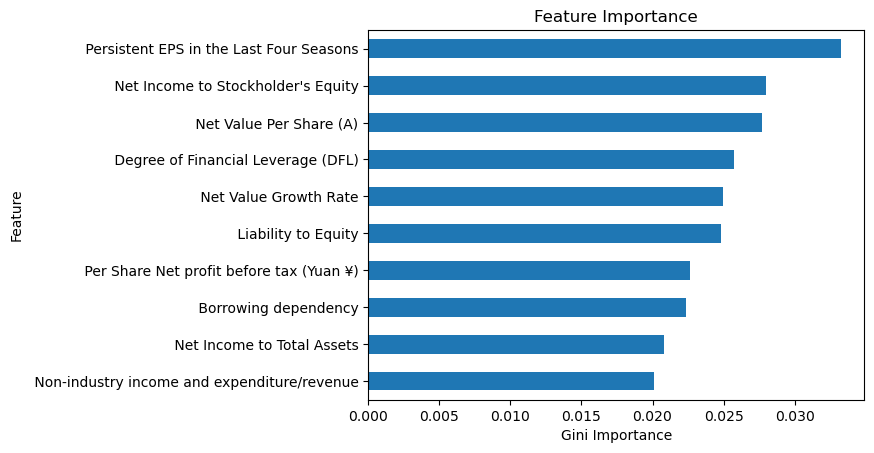

In [24]:
# Get feature names from training data
features = X_train_over.columns
# Extract importances from model
importances = best_model.feature_importances_

# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features).sort_values()
# Plot 10 most important features
feat_imp.tail(10).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

## Feature Importance based on Gini Importance (also known as Mean Decrease in Impurity)

## Insights:

### Top Features:
1) Net Income to Stockholder's Equity is the most influential feature in the model.
2) Net profit before tax/Paid-in capital follows closely, indicating its strong impact on the target variable.
3) Degree of Financial Leverage (DFL) and Persistent EPS in the Last Four Seasons are also highly important.

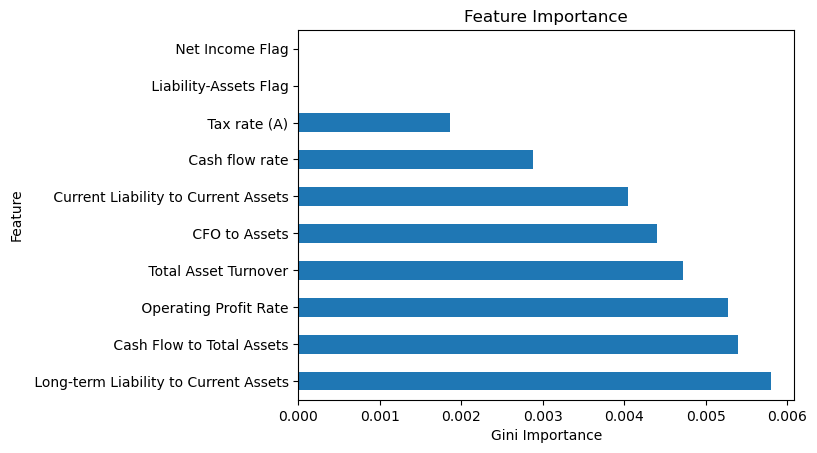

In [25]:
# Get feature names from training data
features = X_train_over.columns
# Extract importances from model
importances = best_model.feature_importances_

# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)
# Plot 10 most important features
feat_imp.tail(10).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

# Explaination of the Feature Importances 
From the visualization of the feature importance Net Value Growth rate is the feature with the greatest contribution power, reasons ......,

In [26]:
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)
feat_imp

Persistent EPS in the Last Four Seasons    0.033225
Net Income to Stockholder's Equity         0.028008
Net Value Per Share (A)                    0.027717
Degree of Financial Leverage (DFL)         0.025717
Net Value Growth Rate                      0.024957
                                             ...   
Current Liability to Current Assets        0.004049
Cash flow rate                             0.002877
Tax rate (A)                               0.001857
Liability-Assets Flag                      0.000000
Net Income Flag                            0.000000
Length: 95, dtype: float64